In [1]:
import pandas as pd
from pathlib import Path
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA

from tqdm.notebook import tqdm
import time
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 100

In [3]:
file_path = Path("./data/raw/recipes_filtered.csv")
df = pd.read_csv(file_path)

In [4]:
df['Prep Time']=''
keyword_categories = pd.read_csv(Path("./data/raw/keywords.csv"))
for prep in tqdm(keyword_categories['Prep Time'].dropna().str.lower()):
    for j in range(0,len(df)):
        try:
            if df.loc[j,'Keywords'].lower().find(prep)!=-1:
                df.loc[j,'Prep Time']=prep
        except:
            continue


  0%|          | 0/4 [00:00<?, ?it/s]

In [5]:
df_combined_prep=df[['AggregatedRating', 'Prep Time']]
df_combined_prep.drop(index=df_combined_prep[df_combined_prep['Prep Time']==''].index,inplace=True)
# df_combined_health.loc[df_combined_health['Health']=='', 'Health']='No dietary restrictions'
df_combined_prep.dropna(inplace=True)
df_combined_prep



,AggregatedRating,Prep Time
1,4.5,< 60 mins
3,4.5,< 60 mins
4,5.0,< 60 mins
5,4.0,< 4 hours
6,5.0,< 4 hours
...,...,...
123607,5.0,< 15 mins
123608,5.0,< 15 mins
123609,5.0,< 30 mins
123610,5.0,< 30 mins


In [6]:
prep_count=df_combined_prep['Prep Time'].value_counts()<100
for prep in prep_count.index:
    if prep_count[prep]:
        df_combined_prep.drop(df_combined_prep[df_combined_prep['Prep Time']==prep].index,inplace=True)
df_combined_prep['Prep Time'].value_counts()

Prep Time
< 60 mins    34614
< 30 mins    28954
< 15 mins    24602
< 4 hours    23365
Name: count, dtype: int64

In [7]:
Prep_ranking=pd.DataFrame(df_combined_prep.groupby('Prep Time').mean()['AggregatedRating'].sort_values(ascending=False))
Prep_ranking

,AggregatedRating
Prep Time,
< 15 mins,4.775892
< 4 hours,4.744960
< 30 mins,4.737981
< 60 mins,4.721702


In [8]:
# df_combined_country['Country'].value_counts()
from numpy import random
import matplotlib.pyplot as plt
boxes=[]
labels=[]
for prep in Prep_ranking.index:
    boxes.append(df_combined_prep[df_combined_prep['Prep Time']==prep]['AggregatedRating'])
    labels.append(prep)

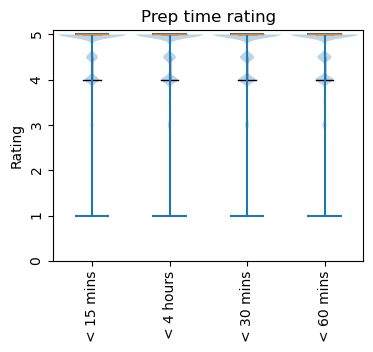

In [16]:
import seaborn as sns
plt.figure(figsize=(4,3))
plt.boxplot(boxes,labels=labels, showbox=False, flierprops={'marker': 'o', 'markersize': 0, 'markeredgecolor': 'red'} )
plt.violinplot(boxes, widths=.9)
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.ylabel('Rating')
plt.title('Prep time rating')
plt.ylim(0,5.1)
plt.show()

In [5]:
# Country_ranking.to_csv('Country_ranking.csv')